# 9th Mesoscopic Physics Summer School - 2020

# QuTiP tutorial

Instructor: Dohun Kim, 물리천문학부 Seoul National University 
Online instruction - 2020/9/3 목요일 저녁 5-7시

도입: 최근들어 양자역학, 양자정보, 중시계 물리, 나노 소자물리 등 다양한 분야의 실험 및 이론 연구를 효율적으로 수행하는데 도움이 되는 많은 수치해석 툴들이 개발되고 있다. 특히, 현대 컴퓨터의 계산능력은 비약적으로 발전하여 예전에는 클러스터, 슈퍼 컴퓨터가 필요했던 계산 중 많은 것들을 개인용 PC 에서도 쉽게 계산할 수 있게 되어 Computational method 를 활용할 수 있는 능력은 실험가, 이론가를 막론하고 필수적인 스킬로 대두되고 있다. 본 강의에서는 다양한 툴 중 python 을 기반으로 한 양자역학, 다체계 양자다이나믹스를 시뮬레이션 하는 quTip 패키지를 소개하고 가장 간단한 형태의 사용법을 실습해 본다. 

시작하기에 앞서: 누구를 위한 툴인가?
quTip 은 양자 다이나믹스를 시뮬레이션하는 툴이다. 일반적인 양자역학 계산을 수행할 수 있지만, 그 중에서도 상호작용하는 particle 의 양자역학을 풀고, 계와 환경의 상호작용을 열린 양자계의 관점에서 모사하는데 특화되어 있는 패키지이다. 가장 직접적으로 연관있는 연구분야로는 양자정보학, 양자광학, 양자측정, 중시계 물리에서 다루는 Fermi-Hubbard 모델 계산, 양자 컴퓨팅 회로 모델 등이 있다. 중시계 물리에서 예를 들자면 다양한 나노소자 (초전도 트랜스몬, 다이아몬드 점결함, 반도체 스핀 큐비트, 이온 트랩 큐비트, 원자격자) 등으로 구현하는 큐비트 시스템은 본 quTip 툴로 계산하기 좋은 시스템이다. 특히, 다양한 Master Equation Solver (Lindblad 형태, Stochastic Master equation, Quantum Monte Carlo method 등)들이 사용하기 편하게 구성되어 있다. 

이와 비교하여 중시계 물리에서는 양자수송 - 결맞은 전자 수송 등을 컴퓨터로 시뮬레이션 하는 일도 수행한다. GaAs 고이동도 기판에 구성한 전자 간섭계, 그래핀, 2차원 물질에서 측정하는 다양한 결맞은 수송 효과, differential conductance 측정 등등. 이러한 transport 현상은 금요일에 배울 또 다른 패키지인 Kwant 툴을 이용하여 계산하는 것이 용이하다고 할 수 있다. 연구자의 분야에 따라 주로 쓰는 툴이 다를 수 있을 것이다. 그러나 하나의 연구에서 두 분야의 툴이 모두 필요한 경우도 많이 찾아볼 수 있는데 예를 들어 반도체 양자점을 연구할 때 양자점을 통과하는 전자의 전도도를 측정하는일과 양자점에 속박된 단일전자의 스핀상태를 큐비트로 응용하는 연구 모두 수행하기도 하여 Kwant, quTip 을 혼용하기도 한다. 


quTip 을 실습하기 위한 준비: 강의 전 준비사항으로 처음 시작하는 사람들을 위한 안내서와 open quantum system 의 density matrix, master equation in Markov approximation 에 대한 소개자료를 업로드 하였다. 이를 따라하여 설치하기를 적극 권장한다.

강의형태: 2시간 강의로 quTip 의 모든 기능을 다루는 것은 물론 불가능 하다. 본 강의에서는 가장 간단한 학부 수준 양자역학 문제와 예제를 바탕으로 quTip 으로 시뮬레이션 하는 방법을 살펴보고, 강의 진행 중 가장 많이 쓰이는 qutip 의 문법을 그때그때 소개한다. 준비한 토픽은 다음과 같다. 

1. spin-1/2 이 자기장하에서 precession 하는 문제: 책에 나오는 설명을 좀 더 실제적으로 ?
2. qubit dynamics: 유명한 Rabi oscillation 문제를 근사없이 수치적으로 풀기- 이것만 알면 양자게이트를 마스터 !
3. composite system: tensor product 로 시스템을 확장하고 간단하게 2개 큐비트가 상호작용하는 것 시뮬레이션
4. decoherence: Master equation 을 풀어서 decoherence channel 시뮬레이션 하기
5. Quantum trajectory - quantum monte carlo simulation: Decoherence 를 바라보는 다른 방법 중 하나 

시작에 앞서 우리 강의에서는 c=$\hbar$=1 로 두고 계산한다. 또한 에너지는 모두 주파수, 특히 GHz 로 표현한다. 

참고로 알아두면 유용한 conversion factor: 1 GHz 는 약 4.1 $\mu eV$ 이다. 

또한, 아래의 예제는 극히 한정된 튜토리얼이다. 혼자 연습할때 모르는 기능은 언제나 http://qutip.org/docs/latest/index.html 에 들어가서 사용법을 검색해보는 것을 적극 추천함.

우선 필요한 모듈들을 import 한다. 

In [1]:
import matplotlib.pyplot as plt  # 그림 플롯할때 쓰는 패키지 로드
import numpy as np   #python 에서 수학표현을 쓰는 패키지
from qutip import *  #제일 중요한 quTip 로드
from qutip.ui.progressbar import TextProgressBar as ProgressBar #계산 진행상황을 표시해주는 기능

#참고: import 는 내가 필요한 파이썬 패키지를 로딩할 때 쓰는 명령어 이다. (1) import 패키지 이름 또는 (2) from 패키지 이름 import * 
#의 두가지 방식으로 가능하다. 두 방식의 차이는 (1)방식으로 로드 하면 패키지 안의 기능을 쓸때, 예를 들어 np 안에 있는 sqrt 를 
#쓰려면 np.sqrt() 처럼 써야하는 반면 (2)방식으로 로드하면 그냥 sqrt() 로 쓰면 된다는 것이다. (2) 방식이 나중에 편할 수 있는데 
#명령어가 중복될 경우 충돌할 수 있다는 단점이 있다. 

# 1. Spin precession : adiabatic vs. non-adiabatic

학부 양자역학에서 다음과 같은 자기장하에 놓여있는 스핀-1/2을 배웠을 것이다. 

문제: 스핀1/2 인 입자에 외부에서 $B_0$ 크기의 자기장을 z 축 방향으로 걸어주고 있다. 즉, 해밀토니안은 다음과 같다.
### $H=-\frac{\gamma}{2} B_0 \sigma_z$ 
여기서 $\gamma$ 는 입자의 gyromagnetic ratio 이다. 시간 0에서 초기상태는 스핀이 x 방향을 가르키는 상태라고 할때, 시간에 따라 스핀의 x,y,z 방향의 기대값은 어떻게 변하는가? 

답: 스핀의 x 방향, y 방향 기대값은 시간에 따라 진동하며 z 방향 기대값은 변화가 없다. x 방향 스핀은 z 축으로 걸어준 자기장에서 Larmor frequency 로 precession 하고 이 문제에서는 xy 평면에서 회전하기 때문이다. 첫번째 예재로 이를 quTip 으로 간단히 표현해 보자. 

In [2]:
def qubit_integrate(gamma, B0, solver):  #보통 시간에 따른 계산을 하는 파트를 이처럼 def 문구로 함수를 정의해서 쓴다. 자세한 설명은 
    #강의에서...

    H0 = -gamma*B0*1/2*sigmaz() #해밀토니안: 파울리 z 방향 매트릭스는 qutip 에서 sigmaz() 로 표현한다. 다른 상수들은 아래에서 정의
    
    H=H0
    # collapse operators
    c_ops = [] # 뒤에 배울 decoherence 를 주는 Lindblad operators, 지금예제에서는 없음 

    e_ops = [sigmax(), sigmay(), sigmaz()] #결과값으로 기대값을 알고 싶은 operator 들
    
    #아래에는 solver 의 종류 - 대표적으로 me:Master equation solver, es:Exponential series solver, mc:Monte-Carlo solver 
    #같은 문제를 여러 다른 솔버로 풀 수 있다. 또한 본 예제에서는 state vector 를 초기상태로 풀지만 density matrix 로 표현하여 
    #푸는것도 가능. 자세한 얘기는 강의에서...
    
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops) #mesolve 사용법 mesolve(해밀토니안, 초기상태(켓벡터 또는 density matrix
        # ,풀어야하는 시간그리드, Lindblad operators, 기대값을 계산할 operators))
        
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, e_ops)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

In [3]:
#상수들
gamma = 0.042/(2*np.pi) #Gyromagnetic ratio. 본 예제에서는 수소 원자핵 (프로톤)의 값을 넣었다. 단위는 GHz/Tesla. 
#즉, 프로톤 스핀은 1테슬라의 자기장을 걸어주면 약 42 MHz 의 세차운동 주파수 (에너지로 환산하면 얼마?) 를 가진다. 다른원소들 위키에서 찾아보기!
B0 = 10 #자기장의 크기 단위 테슬라

#초기상태 스핀이 x 방향을 가르키는 상태는 z 방향의 eigenstate 의 중첩
psi0 = 1/np.sqrt(2)*(basis(2,0)+basis(2,1)) # basis 는 (힐버트 스페이스의 차원, 상태인덱스 0이 바닥상태) 로 표현하는 기저를 나타낸다.

tlist = np.linspace(0,1000,1000) #문제를 풀 시간의 그리드 처음에 numpy 를 np 라는 이름으로 import 하였다
# 따라서 linspace 를 쓰려면 np.linspace(처음, 끝, 개수) 여기서는 0에서 1000 나노초를 1000개로 나누었다.


여기까지 세팅하고 이제 풀자.

In [4]:
import time   # 시간재는 타이머 패키지 불러옴
start_time = time.time()   #현재시간 기록
sx1, sy1, sz1 = qubit_integrate(gamma, B0, "me")  #계산의 결과중 첫번째를 x 방향 스핀의 기대값, 둘째, 셋째를 y,z 기대값으로 기록
print('time elapsed = ' + str(time.time() - start_time)) #계산에 걸린 시간 프린트

time elapsed = 0.08001017570495605


계산결과를 그림으로 그려보자. 기대했던대로 세차운동하는 그림이 나온다.

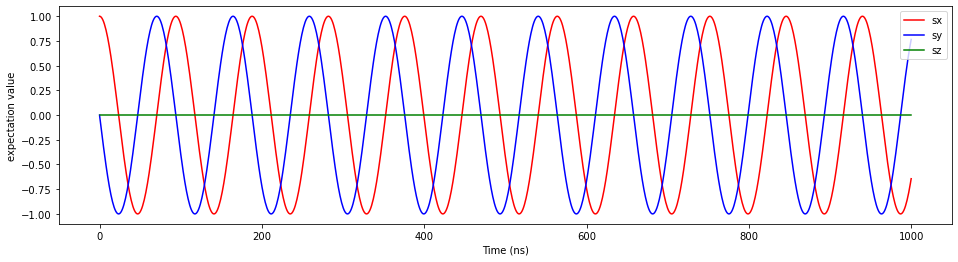

In [5]:
fig, ax = plt.subplots(figsize=(16,4)) #matplotlib 라는 패키지를 plt 라는 이름으로 import 하였다. plt. 을 사용하여 기능들을 써보자. 
# 첫번째 예는 subplot 이라는 명령어를 사용하여 16,4 가로세로 크기의 플롯하나를 생성
ax.plot(tlist, np.real(sx1), 'r') #sx1 플롯하고 색깔은 빨간색으로
ax.plot(tlist, np.real(sy1), 'b') #sy1 플롯하고 색깔은 파랑색으로
ax.plot(tlist, np.real(sz1), 'g') #sz1 플롯하고 색깔은 녹색으로
ax.legend(("sx", "sy", "sz")) #Legend 추가
ax.set_xlabel('Time (ns)') #x 축 라벨 추가
ax.set_ylabel('expectation value'); #y 축 라벨 추가

quTip 에서는 Bloch vector 를 쉽게 그릴 수 있는 툴을 제공하고 있다. 계산결과를 Bloch sphere 에 그려보자. 역시 예상한대로 XY 평면에서 스핀이 z 축을 중심으로 도는 모양을 볼 수 있다. 

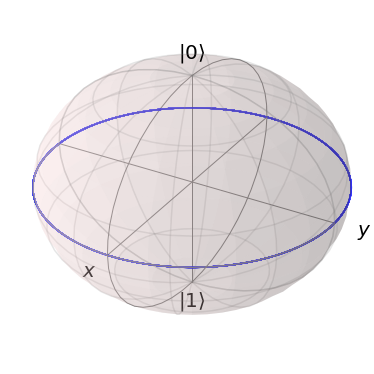

In [6]:
sphere=Bloch() #Bloch sphere 생성
sphere.add_points([sx1,sy1,sz1], meth='l') #Bloch sphere 에 계산한 x,y,z 기대값 포인트들을 추가, 여기서 meth='I'는 포인트들을 
#연결하여 표시하는 옵션. quTip document 를 통해 여러가지 색깔과 방법으로 Bloch sphere 그리는 연습하세요.
sphere.show() #Bloch sphere 를 보여주는 명령

# 연습: 위의 예제를 다른 솔버를 택해서 실행해보기 - 결과들이 완전히 같은가?

여기까지는 quTip 이 전혀 필요없을 정도로 손으로도 쉽게 계산할 수 있는 예제였다. 이제 이 상황을 좀 더 현실적으로 만들어 보자.

(1) 애초에 x 방향으로 정렬한 스핀은 자기장도 x 방향으로 걸어서 준비했을 것이다. 그러니 더 현실적인 상황은 자기장이 원래는 x 방향으로 걸려있다가 어느순간 z 방향으로 바뀌었을 때 처음 x 방향을 가르키는 스핀이 어떻게 변하는지 보는것이다. 

(2) 여기에 더해서 자기장의 방향이 바뀔때에도 현실적으로는 순간적으로 바뀔수는 없을 것이다. 자기장의 방향이 바뀌는데 시간이 걸린다면 어떻게 될까? 

(1) 과 (2) 와 같은 현실적인 상황은 essentially Time dependent Hamiltonian 을 푸는 문제이다. quTip 에서는 다음과 같이 해밀토니안만 Time dependence 를 추가하면 위의 예제와 거의 비슷하게 풀 수 있다. 여기서 연습을 좀 요하는 부분은 time dependence 를 지정해주는 부분이다. 아래 코드를 보자.

In [7]:
def qubit_integrate2(gamma, B0, t0, A):  #위에서와 같이 함수를 정의, 여기서는 두가지 파라미터가 추가되었다. t0는 자기장이 
    # x축에서 z 축으로 바뀌는 시간이고, A는 그러한 축 변화가 얼마나 빨리 일어나는가를 정하는 스케일 파라미터이다. 

    H0 = 0 #Time independent part 는 여기서는 0
    H1 = -gamma*B0*1/2*sigmax() #Time dependent part 첫번째, 시간에 따라 사라지는 x축 파트 
    H2 = -gamma*B0*1/2*sigmaz() #Time dependent part 두번째, 시간에 따라 생겨나는 z축 파트
    
    H=[[H1,'(1/(1+np.exp((t-t0)/A)))'],[H2,'(1/(1+np.exp((t0-t)/A)))']]
    args={'t0': t0, 'A':A }
    #위 두줄이 핵심파트이다. H=[[H1,시간에대한 함수],[H2,시간에 대한 함수]] 는 H=H1*시간함수 + H2*시간함수 라는 뜻으로서 이 예제에서는 
    #x축 파트는 t0 시간을 중심으로 Fermi-Dirac 분포처럼 A 의 '시간폭' 을 가지고 사라지는 동시에 
    #z축 파트는 t0 시간을 중심으로 Fermi-Dirac 분포처럼 A 의 '시간폭' 을 가지고 나타나는 듯이 모델링하였다. 물론 Fermi-Dirac 분포를 
    #사용한 것은 그냥 간단한 함수중에 이런 변화를 쉽게 표현하기 위함이다. 중요한 것은 시간에 대한 함수를 문자열로 '' 안에 써야한다.
    #또한 H 의 시간에 대한 함수파트에서 파라미터로 사용하는 t0 와 A 는 아래줄에 args = ... 로 정의해둬야 한다.    
    
    # collapse operators
    c_ops = [] # 뒤에 배울 decoherence 를 주는 Lindblad operators, 지금예제에서는 없음 

    e_ops = [sigmax(), sigmay(), sigmaz()] #결과값으로 기대값을 알고 싶은 operator 들
    
    output = mesolve(H, psi0, tlist, c_ops, e_ops,args) #mesolve 사용법 mesolve(해밀토니안, 초기상태(켓벡터 또는 density matrix
        # ,풀어야하는 시간그리드, Lindblad operators, 기대값을 계산할 operators, 여기서는 위에서 정의한 시간함수의 파라미터를 정의한 args 도 추가))
        
    return output.expect[0], output.expect[1], output.expect[2]

In [8]:
#상수들
gamma = 0.042/(2*np.pi) #Gyromagnetic ratio. 본 예제에서는 수소 원자핵 (프로톤)의 값을 넣었다. 단위는 GHz/Tesla. 
#즉, 프로톤 스핀은 1테슬라의 자기장을 걸어주면 약 42 MHz 의 세차운동 주파수 (에너지로 환산하면 얼마?) 를 가진다. 다른원소들 위키에서 찾아보기!
B0 = 10 #자기장의 크기 단위 테슬라

#초기상태 스핀이 x 방향을 가르키는 상태는 z 방향의 eigenstate 의 중첩
psi0 = 1/np.sqrt(2)*(basis(2,0)+basis(2,1)) # basis 는 (힐버트 스페이스의 차원, 상태인덱스 0이 바닥상태) 로 표현하는 기저를 나타낸다.

tlist = np.linspace(0,10000,1000) #문제를 풀 시간의 그리드 처음에 numpy 를 np 라는 이름으로 import 하였다
# 따라서 linspace 를 쓰려면 np.linspace(처음, 끝, 개수) 여기서는 0에서 10000 나노초를 1000개로 나누었다. 위 문제보다 더 긴 시간 스케일을 시뮬레이션

A=1   #얼마나 빨리 x 축에서 z축으로 걸어주는 자기장의 방향이 바뀌는가?
t0=5000  #시뮬레이션 10000 나노초의 중간 5000 나노초를 중심시간으로 설정

In [9]:
import time   # 시간재는 타이머 패키지 불러옴
start_time = time.time()   #현재시간 기록
sx1, sy1, sz1 = qubit_integrate2(gamma, B0,t0,A)  #계산의 결과중 첫번째를 x 방향 스핀의 기대값, 둘째, 셋째를 y,z 기대값으로 기록
print('time elapsed = ' + str(time.time() - start_time)) #계산에 걸린 시간 프린트

D:\programdata\Anaconda3\envs\qutip-env\lib\site-packages\qutip\sesolve.py:167: RuntimeWarning: overflow encountered in exp
  func(0., v, *ode_args) + v
D:\programdata\Anaconda3\envs\qutip-env\lib\site-packages\scipy\integrate\_ode.py:1007: RuntimeWarning: overflow encountered in exp
  y1, t, istate = self.runner(*args)


time elapsed = 4.775594472885132


일단, Time independent 경우보다 (당연히) 시간이 훨씬 더 걸린다. 이제, 결과를 플롯해보자. 우선 A=1 정도로 설정, 즉 t=5000 나노초에서 매우 갑자기 자기장의 방향이 x 축에서 z 축으로 바뀌는 경우

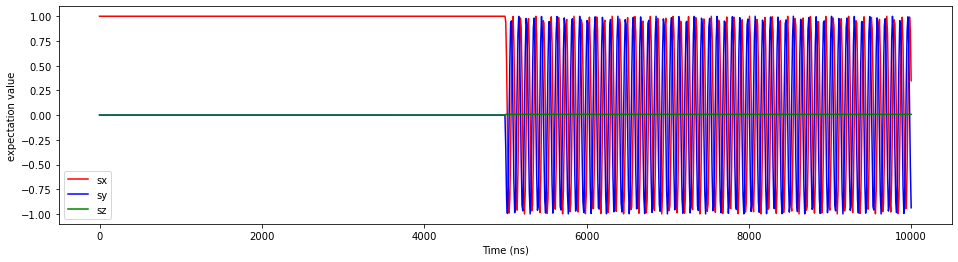

In [10]:
fig, ax = plt.subplots(figsize=(16,4)) #matplotlib 라는 패키지를 plt 라는 이름으로 import 하였다. plt. 을 사용하여 기능들을 써보자. 
# 첫번째 예는 subplot 이라는 명령어를 사용하여 16,4 가로세로 크기의 플롯하나를 생성
ax.plot(tlist, np.real(sx1), 'r') #sx1 플롯하고 색깔은 빨간색으로
ax.plot(tlist, np.real(sy1), 'b') #sy1 플롯하고 색깔은 파랑색으로
ax.plot(tlist, np.real(sz1), 'g') #sz1 플롯하고 색깔은 녹색으로
ax.legend(("sx", "sy", "sz")) #Legend 추가
ax.set_xlabel('Time (ns)') #x 축 라벨 추가
ax.set_ylabel('expectation value'); #y 축 라벨 추가

In [11]:
sphere=Bloch() #Bloch sphere 생성
sphere.add_points([sx1,sy1,sz1], meth='l') #Bloch sphere 에 계산한 x,y,z 기대값 포인트들을 추가, 여기서 meth='I'는 포인트들을 
#연결하여 표시하는 옵션. quTip document 를 통해 여러가지 색깔과 방법으로 Bloch sphere 그리는 연습하세요.
sphere.show() #Bloch sphere 를 보여주는 명령

기대했던대로 5000 나노초까지는 스핀이 x 방향을 가르키고 있다가, 5000 나노초 이후에는 z 축을 중심으로 precession 한다. 위의 예제와 동일. 이번에는 A를 1000 정도로 자기장의 방향이 상당히 느리게 x 축에서 z 축으로 바뀌면 ? 

time elapsed = 3.9247307777404785


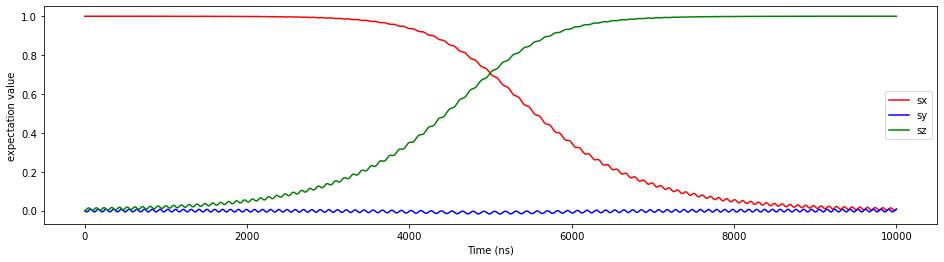

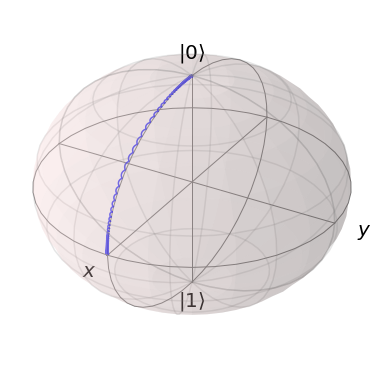

In [12]:
A=1000   #얼마나 빨리 x 축에서 z축으로 걸어주는 자기장의 방향이 바뀌는가?
t0=5000  #시뮬레이션 10000 나노초의 중간 5000 나노초를 중심시간으로 설정

import time   # 시간재는 타이머 패키지 불러옴
start_time = time.time()   #현재시간 기록
sx1, sy1, sz1 = qubit_integrate2(gamma, B0,t0,A)  #계산의 결과중 첫번째를 x 방향 스핀의 기대값, 둘째, 셋째를 y,z 기대값으로 기록
print('time elapsed = ' + str(time.time() - start_time)) #계산에 걸린 시간 프린트

fig, ax = plt.subplots(figsize=(16,4)) #matplotlib 라는 패키지를 plt 라는 이름으로 import 하였다. plt. 을 사용하여 기능들을 써보자. 
# 첫번째 예는 subplot 이라는 명령어를 사용하여 16,4 가로세로 크기의 플롯하나를 생성
ax.plot(tlist, np.real(sx1), 'r') #sx1 플롯하고 색깔은 빨간색으로
ax.plot(tlist, np.real(sy1), 'b') #sy1 플롯하고 색깔은 파랑색으로
ax.plot(tlist, np.real(sz1), 'g') #sz1 플롯하고 색깔은 녹색으로
ax.legend(("sx", "sy", "sz")) #Legend 추가
ax.set_xlabel('Time (ns)') #x 축 라벨 추가
ax.set_ylabel('expectation value'); #y 축 라벨 추가

sphere=Bloch() #Bloch sphere 생성
sphere.add_points([sx1,sy1,sz1], meth='l') #Bloch sphere 에 계산한 x,y,z 기대값 포인트들을 추가, 여기서 meth='I'는 포인트들을 
#연결하여 표시하는 옵션. quTip document 를 통해 여러가지 색깔과 방법으로 Bloch sphere 그리는 연습하세요.
sphere.show() #Bloch sphere 를 보여주는 명령

완전히 다른 다이나믹스를 보인다. 우리가 상식적으로 생각하는 쪽에 가까운 결과. 즉, 자기장을 천천히 x 축에서 z 축으로 바꾸면 스핀도 각각의 시간에 eigen state 를 유지하면서 x 방향에서 z 방향으로 바뀐다.

이것이 adiabatic evolution 과 non-adiabatic evolution 의 차이이다. 이처럼 quTip 을 활용하면 상당히 현실적으로 시간에 따라 Hamiltonian 이 바뀌는 상황에서 양자상태의 전산모사를 쉽게 수행할 수 있다.

# 연습: 위의 예제를 A 를 바꿔가면서 계산해 보자. 

물리문제 : 그럼 주어진 상황에서 자기장의 방향이 '갑자기' 또는 '느리게' 바뀌는 기준은 무었인가 ? 

# 2. Driven spin dynamics : Rabi oscillation without approximation

학부수준 양자역학에서 다음과 같은 문제도 흔히 나온다. 자기공명에 대한 것

문제: z 축으로 균일한 자기장에 스핀 1/2 입자가 놓여있고 초기상태는 z 방향 스핀의 바닥상태이다. 여기에 x 축으로 시간에 따라 Harmonic oscillation 하는 교류 자기장을 적당한 진폭과 주파수로 걸어주면 스핀의 x,y,z 방향 기대값은 시간에 따라 어떻게 변화하는가? 해밀토니안은 다음과 같다. 

### $H=\frac{\omega_0}{2}\sigma_z+v_{amp} \sigma_x cos(\omega_{mw}t)$

답: 유명한 자기공명에 대한 문제로서 공명하는 경우, 즉 Larmor 주파수 = 걸어준 교류 자기장 주파수의 경우 Rabi 진동이라는 스핀의 z 방향 기대값이 시간에 따라 oscillation 한다. 학부, 대학원 양자역학을 걸쳐서 Time dependent perturbation theory 에서 흔히 다루는 문제이고 양자컴퓨팅에서는 이를 이용해서 큐비트의 중첩상태를 바꾸는 양자게이트를 만들기도 한다. 손으로 푸는 경우 흔히 Rotating wave approximation 을 써서 Rotating frame 에서 풀기도 하는데, 우리는 qutip 을 가지고 approximation 없이 brute force 로 풀어보자

In [13]:
def qubit_integrate3(w0, vamp, wmw, g1, g2, solver):  #또다시 함수 정의, 사용하는 파라미터도 적당히 설정

    H0 = -w0 / 2.0 * sigmaz()
    H1 = vamp / 2.0 * sigmax()
    args={'wmw': wmw}
    H = [H0,[H1,'np.cos(wmw*t)']]  #시간파트에 코사인 함수가 들어간다. 역시 문자열로 정의
        
    # collapse operators
    c_ops = []   #아직까지 decoherence 는 고려하지 않음

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
        
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops,args)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops,args)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, [sigmax(), sigmay(), sigmaz()],args)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

메인 함수를 코딩했으니 상수들 결정하고 풀자.

In [14]:
w0 = 10.0 * 2 * np.pi   # qubit frequency, 직류 자기장에 의한 Larmor frequency 에 해당
vamp   = 1 * 2 * np.pi   # Rabi amplitude, 교류 자기장의 진폭
wmw = 10.0 * 2 * np.pi   # driving frequency, 교유 자기장 주파수, 지금의 경우는 공명하는 경우이다.
g2 = 0.0  #decoherence rate 에 해당하는데 지금은 0
g1 = 0.0  #decoherence rate 에 해당하는데 지금은 0

# intial state
psi0 = basis(2,0)

tlist = np.linspace(0,3,1000) #여기서는 0에서 3나노초까지 1000개로 나눔


In [15]:
import time
start_time = time.time()
sx1, sy1, sz1 = qubit_integrate3(w0, vamp, wmw, g1, g2, "me")
print('time elapsed = ' + str(time.time() - start_time))

time elapsed = 4.232022047042847


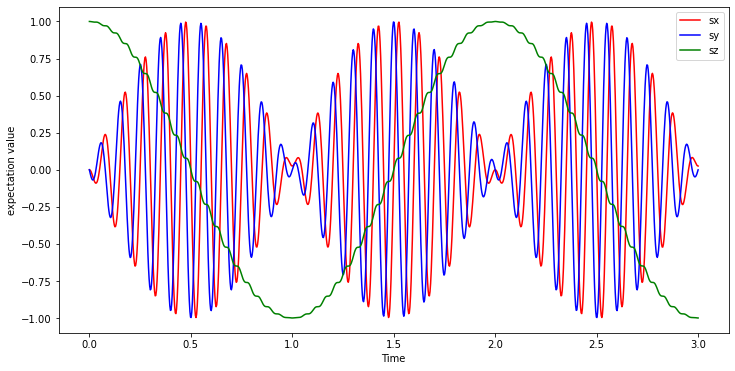

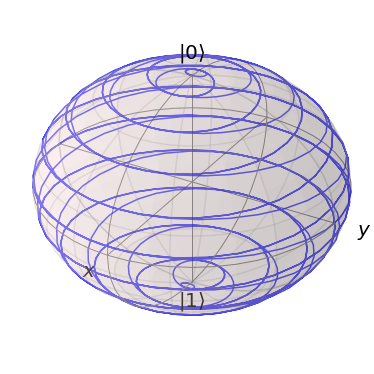

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx1), 'r')
ax.plot(tlist, np.real(sy1), 'b')
ax.plot(tlist, np.real(sz1), 'g')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

sphere=Bloch()
sphere.add_points([sx1,sy1,sz1], meth='l')
sphere.show()

<$\sigma_z$> (녹색커브)가 시간에 따라 진동하는것을 볼 수 있다. 또한 <$\sigma_x$>, <$\sigma_y$> 도 세차운동을 하는것을 approximation 없이 계산가능하다. Rotating wave approximation 에서는 볼 수 없는 것 까지 시뮬레이션 가능함.

# 연습: 위의 예는 공명하는 경우이다. 

(1) 공명할때 녹색커브가 더 빠르게 진동하게 하려면 어떻게 해야하는가? $v_{amp}$ 를 바꿔가며 실행해보자.

(2) 교류주파수를 달리해서 공명하지 않을때로 계산해보자.

(3) 교류주파수도 범위를 주어 바꿔가면서 걸어준 주파수 (세로축- 범위는 공명주파수를 중심으로 작은쪽과 큰쪽을 모두 포함하게), 시간 (가로축), $<\sigma_Z>$ (z 값) 의 2차원 그림을 계산하고 그려보시오. 본 예에서 한번 계산하는데 몇초 걸리므로 교류주파수 100개정도 계산하려면 10분정도 걸릴 수 있다. 

# 3. Composite system - tensor product and two qubit dynamics

3번째로 배울 qutip 기초내용은 composite system 이다. 다음의 상호작용하는 두개의 큐비트를 통해 qutip 에서 tensor product 를 사용하는 방법을 알아보자. 새로나오는 명령어들의 설명도 코드안에 주석으로 포함되어 있다. 

문제: 서로 상호작용하는 2개 큐비트의 해밀토니안이 다음과 같이 주어져 있다.

### $H = \frac{J_1}{2}\sigma_{z1}\otimes I + \frac{J_2}{2}I\otimes \sigma_{z2}+ \frac{J_{12}}{2}(\sigma_{z1}-I)\otimes(\sigma_{z2}-I)$

초기상태는 두개 큐비트(스핀)의 방향 모두 x 방향을 가르키는 상태라고 할때 각 스핀의 x,y,z 방향 기대값은 시간에 따라 어떻게 변화하는가? 

In [17]:
use_rwa = False  #수업에서 설명

def twoqubitcalculate(J1,J2,J12,Bac,g1,g2): #이 함수에서는 걸어주는 교류 자기장의 주파수와 걸어주는 시간을 모두 변화시키며 결과를 matrix 로 저장한다.
    rxmat = np.zeros((len(frelist),len(tlist))) # 결과 매트릭스의 모든 엘리먼트를 0으로 초기화
    rymat = np.zeros((len(frelist),len(tlist)))
    rzmat = np.zeros((len(frelist),len(tlist)))
    pbar = ProgressBar(len(frelist)) # 계산진행정도를 나타내는 바의 길이 결정
    # collapse operators, 역시나 아직까지는 decoherence 를 무시
    c_ops = []
    if g1 > 0.0  :
        c_ops.append(np.sqrt(g1) * tensor(sigmam(),qeye(2)))
    # 여기서 처음 나오는 tensor 라는 quTip 명령어. tensor(tensor1, tensor2) 는 두개의 tensor 의 tensor product 를 계산한다. 
    # sigmam() 는 ladder operator, qeye(n) 은 n차원 단위행렬 
                     
    if g2 > 0.0  :
        c_ops.append(np.sqrt(g2) * tensor(sigmaz(),qeye(2)))

    for i in range(len(frelist)):
        pbar.update(i)
        wmw = frelist[i]
        H0 = (J1/2.0)*tensor(sigmaz(),qeye(2))+(J2/2.0)*tensor(qeye(2),sigmaz())+(J12/2.0)*tensor((sigmaz()-qeye(2)),(sigmaz()-qeye(2)))
        H1 = Bac*tensor(sigmax(),qeye(2))
        #위에 쓴 Hamiltonian 의 모양을 qutip 으로 표현
        
        args={'wmw': wmw}
        if use_rwa:
            H = (w0-wmw) / 2.0 * tensor(sigmaz(),qeye(2))+(w02-wmw) / 2.0 * tensor(sigmaz(),qeye(2)) + wR / 2.0 * sigmax()
            output = mesolve(H, rho0, tlist, c_ops, [sigmax(),sigmay(),sigmaz()])           
        else: 
            H = [H0,[H1,'np.cos(wmw*t)']] #option 으로 큐비트 1에 교류자기장도 걸수 있게 함.
            output = mesolve(H, rho0, tlist, c_ops, [tensor(sigmax(),qeye(2)),tensor(sigmay(),qeye(2)),tensor(sigmaz(),qeye(2))],args)
            #두개의 큐비트 계이므로 첫번째 큐비트의 x 방향 스핀 기대값을 얻고 싶을때는 차원을 맞추기 위해 tensor(sigmax(),qeye(2)) 의 
            #형태로 써야한다.
            
        rxmat[i] = output.expect[0]
        rymat[i] = output.expect[1]
        rzmat[i] = output.expect[2]
    return [rxmat, rymat, rzmat]



여기까지 메인함수를 썼으니 적당히 상수를 넣어서 계산해보자

In [18]:
J1 = 5 * 2 * np.pi # qubit 1 frequency 큐비트 1의 Larmor frequency
J2 = 10 * 2 * np.pi # qubit 2 frequency 큐비트 2의 Larmor frequency
Bac = 0.0 * 2 * np.pi  # qubit drive amplitude, 큐비트 1번에 가해주는 교류자기장 진폭
J12 = 0.7 * 2 * np.pi # qubit-qubit coupling, 큐비트 간의 상호작용 크기

tlist = np.linspace(0,1,501)
frelist = np.linspace(4,5,2) * 2* np.pi 
g2 = 0.0  # qubit 1 dephasing rate
g1 = 0.0  # qubit 1 relaxation rate

# intial state: 초기상태는 두 스핀 모두 x 방향 eigenstate 이다. 
rho0 = ket2dm(tensor((1/np.sqrt(2))*(basis(2,0)+basis(2,1)),(1/np.sqrt(2))*(basis(2,0)-basis(2,1)))) 
#여기서 처음 등장하는 명령어 ket2dm 는 켓벡터 (pure 한 경우) 를 density matrix 로 바꿔준다.  
rmat=twoqubitcalculate(J1,J2,J12,Bac,g1,g2)

50.0%. Run time:   4.02s. Est. time left: 00:00:00:04


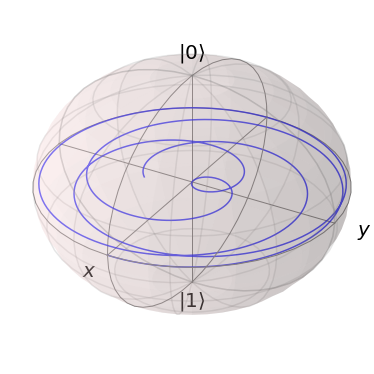

In [19]:
b = Bloch()
b.add_points([rmat[0][0],rmat[1][0],rmat[2][0]],'l')
b.show()


이 결과는 큐비트 1의 시간변화이다. 이 결과의 물리적인 의미에 대한 설명은 2019년 중시계 여름학교에서 강의하였다. 이번에는 이 물리적인 의미에 대해 각자 생각해보자. 

# 연습: 큐비트 간 상호작용의 크기를 바꿔가며 그려보자.

# 연습: 위의 코딩을 수정하여 큐비트 2의 상태의 시간변화를 Bloch sphere 에 그려보시오

# 연습2 : 위의 코딩을 수정하여 큐비트 1,2의 상태 모두의 시간변화를 두개의 Bloch sphere 에 그려보시오

물리문제: 큐비트 1,2의 Bloch vector 의 궤적의 의미를 생각하보자. 특정시간에서 두 Bloch vector 모두 원점을 지난다. 이것이 의미하는 바는 ? 힌트 - entangled state ?

# 4. Master equation 과 Decoherence 

지금까지는 closed system 의 Unitary dynamics 만을 시뮬레이션 하였다. 그러나 모든 실질적인 양자계는 열린양자계로서 외부환경과의 상호작용으로 decohrence 가 나타나는데, 이는 Master equation 으로 흔히 표현할 수 있다. 2019년 중시계 스쿨강의에서 Markov approximation 에서 Master equation 을 설명하였다. 자세한 물리학 강의는 건너뛰도록 하고, Master equation 은 다음과 같이 생겼다. 

### $\frac{d\rho_s}{dt}=-i [H,\rho_s]+\Sigma_\mu (-\frac{1}{2} L_\mu L_\mu^\dagger \rho_s -\frac{1}{2} \rho_s L_\mu L_\mu^\dagger+ L_\mu \rho_s L_\mu^\dagger)$

여기서 $\rho_s$ 는 시스템의 density matrix, $L_\mu$ 는 Lindblad operator (Jump operator) 로서 decoherence 를 모델링 하는 operator 들이다.

가장 흔히 모델하는 decoherence channel 로서 Pure dephasing model 이 있다. 이에 해당하는 Lindblad operator 는 $L_1=\gamma^{1/2} \sigma_+\sigma_-$ 으로 표현된다. 사실 우리가 위에서 배운 코드는 이미 이 decoherence 를 넣고 계산할 수 있도록 짜여져 있다. 다음의 코드에서 확인해보자. 


In [20]:
def qubit_integrate4(w0, vamp, wmw, g1, g2, solver):

    H0 = w0 / 2.0 * sigmaz() 
    H1 = vamp / 2.0 * sigmax()
    args={'wmw': wmw}
    H = [H0,[H1,'np.cos(wmw*t)']]
        
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * Qobj([[0,1],[0,0]])) #여기서 처음 나오는 Oobj 명령어: 괄호안의 행렬을 quTip 에서 사용하는
        # quantum object 로 선언한다. 위에서 배운 basis 로 정의한것도 일반적으로 Oobj 로 선언할 수 있다.  

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * Qobj([[1,0],[0,0]]))

    e_ops = [sigmax(), sigmay(), sigmaz()]
        
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops,args)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops,args)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, [sigmax(), sigmay(), sigmaz()],args,options=options)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

In [21]:
w0 = 10.0 * 2 * np.pi   # qubit frequency
vamp   = 0 * 2 * np.pi   # Rabi amplitude
wmw = 10.0 * 2 * np.pi   # driving frequency
g1 = 0.00
g2 = 1.0

# intial state
psi0 = (1/np.sqrt(2))*(basis(2,0)+1j*basis(2,1))

tlist = np.linspace(0,3,1000)


In [22]:
import time
start_time = time.time()
sx1, sy1, sz1 = qubit_integrate4(w0, vamp, wmw, g1, g2, "me")
print('time elapsed = ' + str(time.time() - start_time))

time elapsed = 4.158447265625


In [23]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(tlist, np.real(sx1), 'r')
ax.plot(tlist, np.real(sy1), 'b')
ax.plot(tlist, np.real(sz1), 'g')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

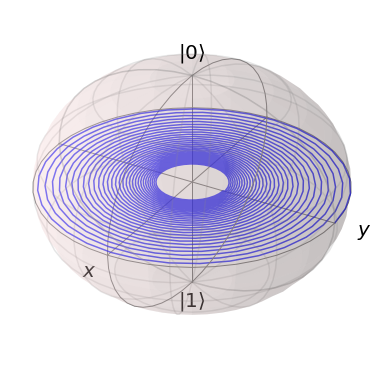

In [24]:
sphere=Bloch()
sphere.add_points([sx1,sy1,sz1], meth='l')
sphere.show()

이처럼 2019년에 배운 pure dephasing 에 의한 decoherence 를 모델링할 수 있다. 

# 연습 : 또 다른 decoherence channel 인 T1 process 에 해당하는 Lindblad 는
# $L_2=\gamma_-^{1/2}$ 와 같다. 이를 넣어서 relaxation 을 시뮬레이션 해보시오. 


# 5. Quantum Trajectory - Quantum Monte Carlo

위에서 배운 간단한 Master equation solver 는 어떤 operator 의 기대값을 푸는데 유용하다. 이는 처음 Master equation 을 유도할 때 외부환경에서 일어나는 일을 알수없다고 가정하고 모든 가능한 경우의 Trace out 을 취해서 얻었기 때문이다. 이를 다른 관점으로 Monte carlo 방식으로 해석해볼 수 도 있다. quTip은 이러한 solver 도 제공하고 있다. 다음의 단순한 예를 보자. 

문제: excited state 에 있는 큐비트가 있다. 이 상태가 relaxation process (위의 예에서 $L_1$ operator)에 의해 relaxation 되는 과정을 Monte carlo 방식으로 시뮬레이션 해보시오.  

아래는 quTip 사이트에 나와있는 이와 관련된 간단한 예이다.

## Introduction to the Quantum Monte-Carlo trajectory method

The Quantum Monte-Carlo trajectory method is an equation of motion for a single realization of the state vector $\left|\psi(t)\right>$ for a quantum system that interacts with its environment. The dynamics of the wave function is given by the Schrodinger equation,

<center>
$\displaystyle\frac{d}{dt}\left|\psi(t)\right> = - \frac{i}{\hbar} H_{\rm eff} \left|\psi(t)\right>$
</center>

where the Hamiltonian is an effective Hamiltonian that, in addition to the system Hamiltonian $H(t)$, also contains a non-Hermitian contribution due to the interaction with the environment:

<center>
$\displaystyle H_{\rm eff}(t) = H(t) - \frac{i\hbar}{2}\sum_n c_n^\dagger c_n$
</center>

Since the effective Hamiltonian is non-Hermitian, the norm of the wavefunction is decreasing with time, which to first order in a small time step $\delta t$ is given by $\langle\psi(t+\delta t)|\psi(t+\delta t)\rangle \approx 1 - \delta p\;\;\;$, where 

<center>
$\displaystyle \delta p = \delta t \sum_n \left<\psi(t)|c_n^\dagger c_n|\psi(t)\right>$
</center>

The decreasing norm is used to determine when so-called quantum jumps are to be imposed on the dynamics, where we compare $\delta p$ to a random number in the range [0, 1]. If the norm has decreased below the randomly chosen number, we apply a "quantum jump", so that the new wavefunction at $t+\delta t$ is given by

<center>
$\left|\psi(t+\delta t)\right> = c_n \left|\psi(t)\right>/\left<\psi(t)|c_n^\dagger c_n|\psi(t)\right>^{1/2}$ 
</center>

for a randomly chosen collapse operator $c_n$, weighted so the probability that the collapse being described by the nth collapse operator is given by
    
<center>
$\displaystyle P_n = \left<\psi(t)|c_n^\dagger c_n|\psi(t)\right>/{\delta p}$ 
</center>


## Decay of a single-photon Fock state in a cavity

This is a Monte-Carlo simulation showing the decay of a cavity Fock state $\left|1\right>$ in a thermal environment with an average occupation number of $n=0.063$ .

Here, the coupling strength is given by the inverse of the cavity ring-down time $T_c = 0.129$ .

The parameters chosen here correspond to those from S. Gleyzes, et al., Nature 446, 297 (2007), and we will carry out a simulation that corresponds to these experimental results from that paper:

### Problem parameters

In [25]:
N = 2               # number of basis states to consider
kappa = 1.0/0.129   # coupling to heat bath
nth = 0.063         # temperature with <n>=0.063

tlist = np.linspace(0,0.6,100)

## Create operators, Hamiltonian and initial state

Here we create QuTiP `Qobj` representations of the operators and state that are involved in this problem.

In [26]:
a = destroy(N)      # cavity destruction operator
H = a.dag() * a     # harmonic oscillator Hamiltonian
psi0 = basis(N,1)   # initial Fock state with one photon: |1>

## Create a list of collapse operators that describe the dissipation

In [27]:
# collapse operator list
c_op_list = []

# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())

## Monte-Carlo simulation

Here we start the Monte-Carlo simulation, and we request expectation values of photon number operators with 1, 5, 15, and 904 trajectories (compare with experimental results above).

In [28]:
ntraj = [1, 5, 15, 904] # list of number of trajectories to avg. over

mc = mcsolve(H, psi0, tlist, c_op_list, [a.dag()*a], ntraj) 
#여기서 처음으로 mcsolve 를 사용하고 있다. 그러나 solver 이름만 다르고 사용하는 방법은 여전히, 해밀토니안, 시간 그리드, 
#jump operator, trajectory 의 개수 (새로운점) 를 넣어주면 실제 Monte Carlo 계산은 quTip 이 알아서 해준다.

10.1%. Run time:   3.20s. Est. time left: 00:00:00:28
20.0%. Run time:   3.44s. Est. time left: 00:00:00:13
30.1%. Run time:   3.66s. Est. time left: 00:00:00:08
40.0%. Run time:   3.89s. Est. time left: 00:00:00:05
50.0%. Run time:   4.11s. Est. time left: 00:00:00:04
60.1%. Run time:   4.34s. Est. time left: 00:00:00:02
70.0%. Run time:   4.57s. Est. time left: 00:00:00:01
80.1%. Run time:   4.80s. Est. time left: 00:00:00:01
90.0%. Run time:   5.02s. Est. time left: 00:00:00:00
100.0%. Run time:   5.21s. Est. time left: 00:00:00:00
Total run time:   5.26s


The expectation values of $a^\dagger a$ are now available in array ``mc.expect[idx][0]`` where ``idx`` takes values in ``[0,1,2,3]`` corresponding to the averages of ``1, 5, 15, 904`` Monte Carlo trajectories, as specified above. Below we plot the array ``mc.expect[idx][0]`` vs. ``tlist`` for each index ``idx``.

## Lindblad master-equation simulation and steady state

For comparison with the averages of single quantum trajectories provided by the Monte-Carlo solver we here also calculate the dynamics of the Lindblad master equation, which should agree with the Monte-Carlo simultions for infinite number of trajectories.

In [29]:
# run master equation to get ensemble average expectation values
me = mesolve(H, psi0, tlist, c_op_list, [a.dag()*a])

# calulate final state using steadystate solver
final_state = steadystate(H, c_op_list) # find steady-state # 새로운 명령어: quTip 은 사용자가 시간이 한참지난 후 
#steady state 만 알고 싶을때 steady state 를 계산해주는 solver 도 제공한다.
fexpt = expect(a.dag()*a, final_state)  # find expectation value for particle number

## Plot the results

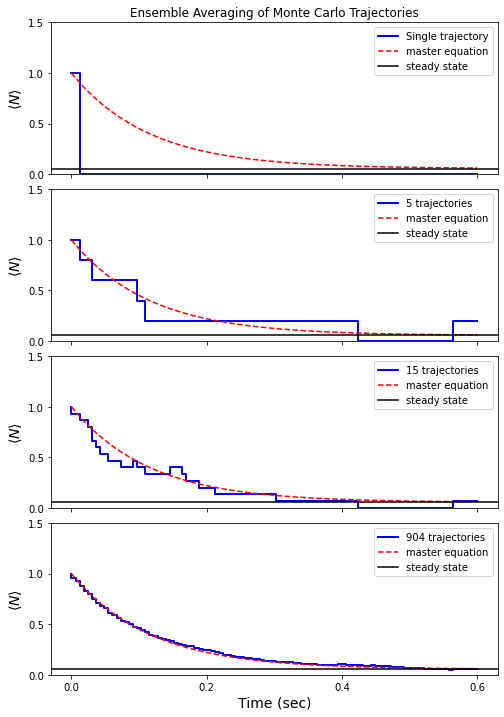

In [30]:
import matplotlib.font_manager
leg_prop = matplotlib.font_manager.FontProperties(size=10)

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(8,12))

fig.subplots_adjust(hspace=0.1) # reduce space between plots

for idx, n in enumerate(ntraj):

    axes[idx].step(tlist, mc.expect[idx][0], 'b', lw=2)
    axes[idx].plot(tlist, me.expect[0], 'r--', lw=1.5)
    axes[idx].axhline(y=fexpt, color='k', lw=1.5)
    
    axes[idx].set_yticks(np.linspace(0, 2, 5))
    axes[idx].set_ylim([0, 1.5])
    axes[idx].set_ylabel(r'$\left<N\right>$', fontsize=14)
    
    if idx == 0:
        axes[idx].set_title("Ensemble Averaging of Monte Carlo Trajectories")
        axes[idx].legend(('Single trajectory', 'master equation', 'steady state'), prop=leg_prop)
    else:
        axes[idx].legend(('%d trajectories' % n, 'master equation', 'steady state'), prop=leg_prop)
        

axes[3].xaxis.set_major_locator(plt.MaxNLocator(4))
axes[3].set_xlabel('Time (sec)',fontsize=14);

이처럼 Monte carlo 의 trajectory 를 평균하는 개수가 증가함에 따라 Master equation 의 solution 에 근접하는 것을 알 수 있다. 

# 마치며:

매우 간단한 상황에서 quTip 을 이용하여 단일스핀, composite system, decoherence 가 있는 경우, Master equation, Monte carlo 방법 등으로 Time independent, Time dependent 양자역학을 푸는 예를 소개하였다. 본 강의에서 소개한 범위는 quTip 으로 할 수 있는 계산 중 극히 일부분을 맛보기 한것으로 Stochastic Master equantion solver, 다른 계산 툴과의 혼합사용, 양자회로 시뮬레이션 등등 다루지 않은 내용도 많다. quTip 사이트에는 매우 다양한 물리문제에 대한 quTip 코드예제들이 업로드되어 있으니 스스로 학습하길 적극 권장한다. 짧은 튜토리얼이지만 본 강의를 통해 quTip의 유용성에 대해 동감했기를 바라며 앞으로 학생들의 연구에 조금이나마 도움이 되었으면 하는 바램이다.  